Using the AR(1) model, we can solve for the noise $z_n$ from measurements:

$$
\begin{align}
x_{n+1} &= \alpha x_n + z_n \\
z_n &= x_{n+1} - \alpha x_n,
\end{align}
$$
knowing
$$
\begin{align}
\alpha &= e^{-k \Delta t}.
\end{align}
$$

[1] "b3um_I1000mA_t50us_fs5kHz.txt"

,V1,V2
1,8.167,6.533
2,8.155,6.648
3,8.104,6.621
4,8.078,6.648
5,8.091,6.588
6,8.133,6.608
7,8.198,6.622
8,8.164,6.587
9,8.132,6.578
10,8.107,6.654


[1] 100000

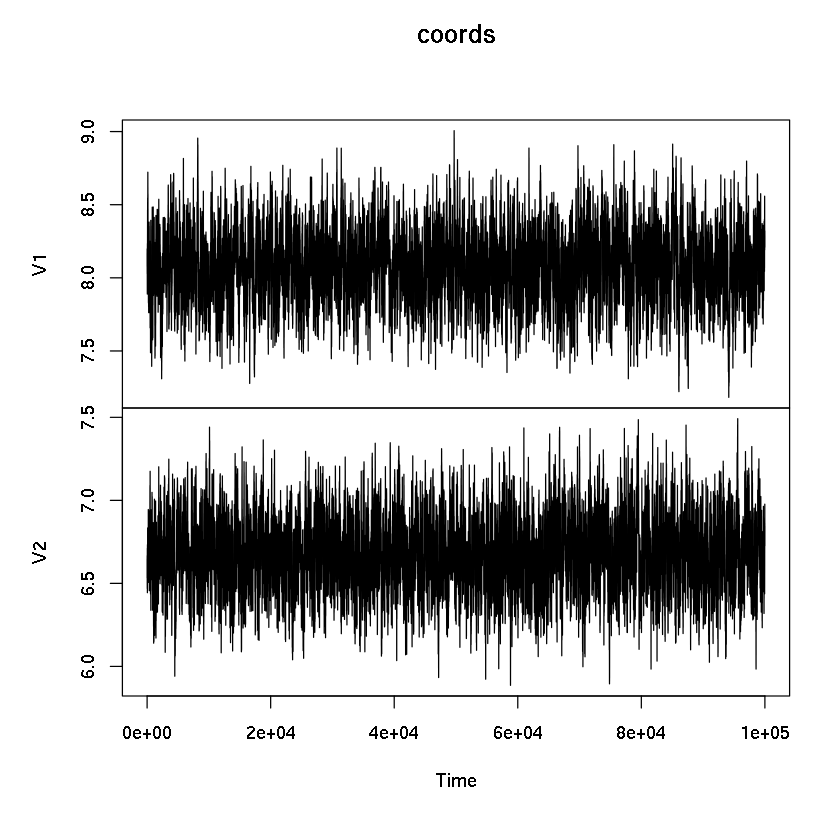

In [12]:
ddir = '../opt tweez data/02_12_2014/2_12_2014_part3/'
files = list.files(ddir)
fn = 5
files[fn]

coords = read.table(paste(ddir,files[fn],sep=''),sep =';',dec = ',')
coords[1:10,]
length(coords[,1])
#coords = ts(coords[,2:3]) # line numbers, etc. present
coords = ts(coords[,1:2])

plot(coords)

In [2]:
fps = 5000
k_est = c(110, 120)
npoints = length(coords[,1])

dt = 1/fps
alpha = exp( -k_est * dt )

list(frequency = fps, dt = dt, k = k_est, alpha = alpha )

$frequency
[1] 5000

$dt
[1] 2e-04

$k
[1] 110 120

$alpha
[1] 0.9782402 0.9762857

In [3]:
# Center the data
coords[,1] = coords[,1] - mean(coords[,1])
coords[,2] = coords[,2] - mean(coords[,2])
coords[1:10,]

z = matrix(, npoints-1, 2)

for(n in 1:npoints-1){
    z[n,] = coords[n+1,] - alpha * coords[n,]
}

z = ts(z)
zxmean = mean(z[,1])
zymean = mean(z[,2])
zxvar = var(z[,1])
zyvar = var(z[,2])

V1,V2
0.09112652,-0.14482918
0.07912652,-0.02982918
0.02812652,-0.05682918
0.00212652,-0.02982918
0.01512652,-0.08982918
0.05712652,-0.06982918
0.12212652,-0.05582918
0.08812652,-0.09082918
0.05612652,-0.09982918
0.03112652,-0.02382918


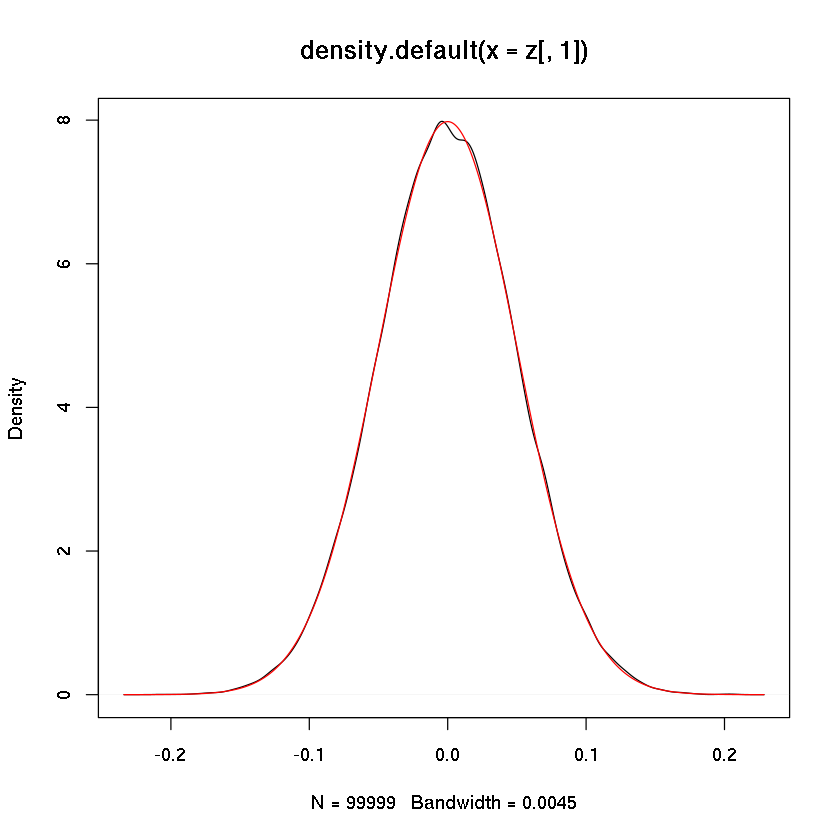

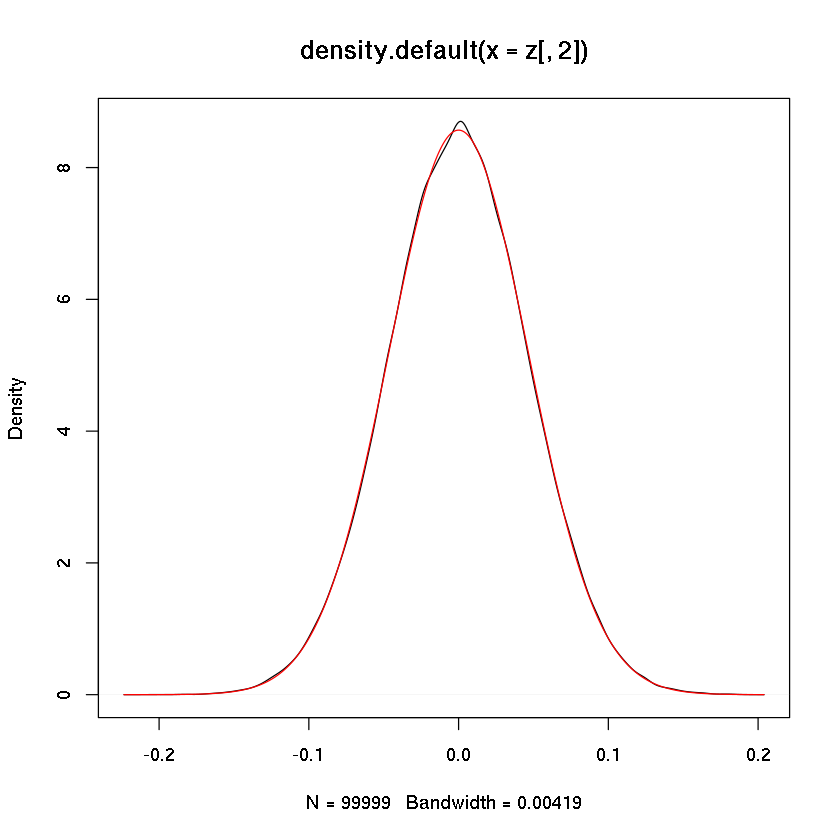

In [7]:
dnszx = density(z[,1])
dnszy = density(z[,2])

plot(dnszx)
lines(dnszx$x, dnorm(dnszx$x, mean = zxmean, sd = sqrt(zxvar)), col='red')

plot(dnszy)
lines(dnszy$x, dnorm(dnszy$x, mean = zymean, sd=sqrt(zyvar)), col='red')

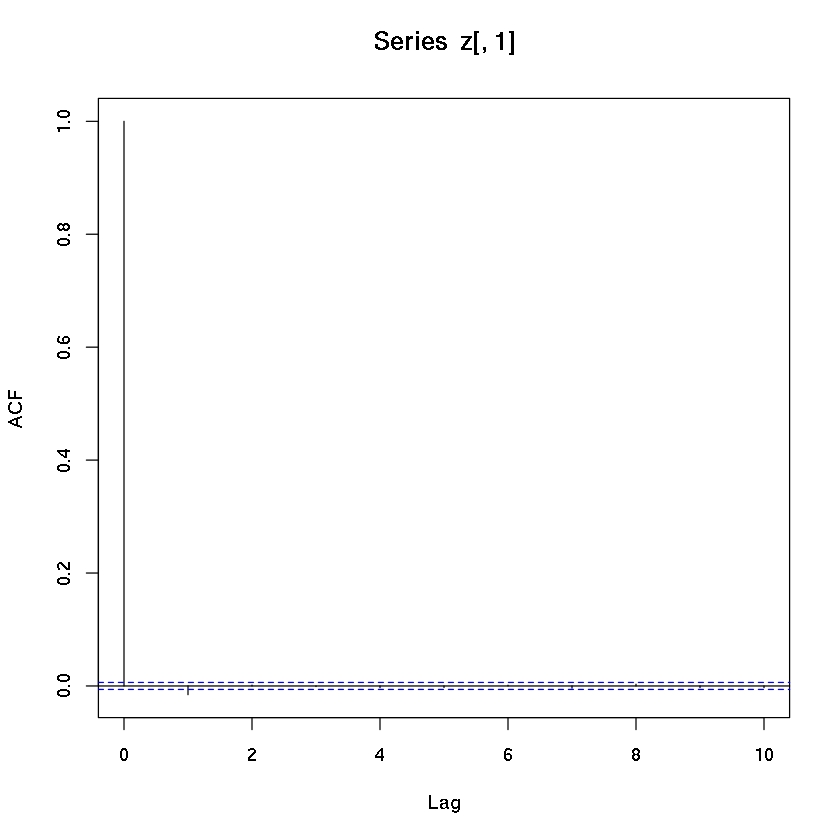

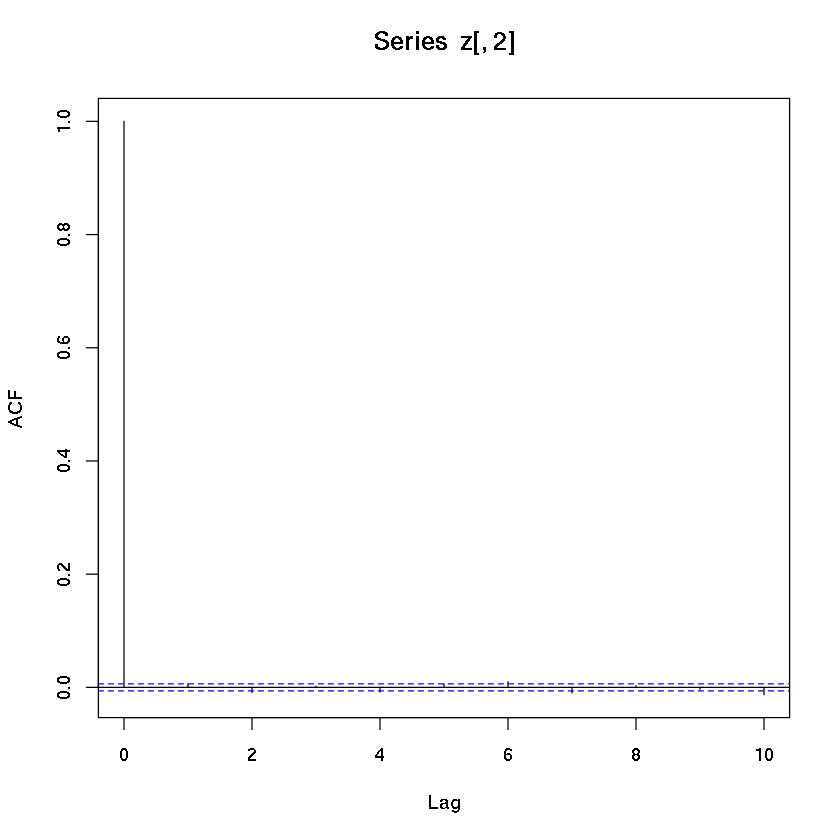

In [11]:
acfzx = acf(z[,1], lag=10)
acfzx = acf(z[,2], lag=10)